In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [ ]:
pig = cv2.imread('/content/1.jpg')

In [ ]:
pig = np.array(pig, dtype=np.float64) / 255

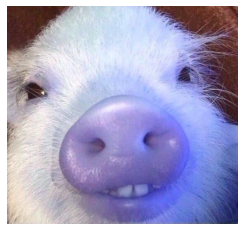

In [ ]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.imshow(pig)

In [ ]:
w, h, d = original_shape = tuple(pig.shape)
assert d == 3
image_array = np.reshape(pig, (w * h, d))

In [ ]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

In [ ]:
def print_picture(n_colors, codebook):
  image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
  kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
  labels = kmeans.predict(image_array)
  plt.figure(3)
  plt.clf()
  plt.axis("off")
  plt.title(f"Quantized image ({n_colors} colors, codebook)")
  plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

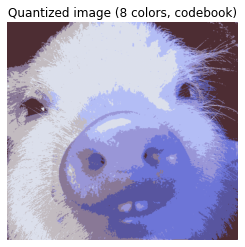

In [ ]:
print_picture(8, 'K-means')  #[K-means, 'Random']